In [2]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\KangByoungWoo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\KangByoungWoo\\AppData\\Local\\Temp\\pip-install-i82q82oz\\wordcloud_837ff4f3bc304a5f9847a9f9cb100506\\setup.py'"'"'; __file__='"'"'C:\\Users\\KangByoungWoo\\AppData\\Local\\Temp\\pip-install-i82q82oz\\wordcloud_837ff4f3bc304a5f9847a9f9cb100506\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\KangByoungWoo\AppData\Local\Temp\pip-wheel-u203arq_'
       cwd: C:\Users\KangByoungWoo\AppData\Local\Temp\pip-install-i82q82oz\wordcloud_837ff4f3bc304a5f9847a9f9cb100506\
  Complete output (20 

In [4]:
!pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_origin = pd.read_csv("excercise_data\Womens Clothing E-Commerce Reviews(수정).csv")

In [7]:
df_origin.head(3)

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,0,Initmates,Intimate,Intimates
1,1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,0,4,General,Dresses,Dresses
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses


In [8]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Unnamed: 0.1             23486 non-null  int64 
 2   Clothing ID              23486 non-null  int64 
 3   Age                      23486 non-null  int64 
 4   Title                    19676 non-null  object
 5   Review Text              22641 non-null  object
 6   Rating                   23486 non-null  int64 
 7   Recommended IND          23486 non-null  int64 
 8   Positive Feedback Count  23486 non-null  int64 
 9   Division Name            23472 non-null  object
 10  Department Name          23472 non-null  object
 11  Class Name               23472 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


In [9]:
df_origin.describe()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,11742.500000,918.118709,43.198544,4.196032,0.177638,2.535936
std,6779.968547,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,5871.250000,861.000000,34.000000,4.000000,0.000000,0.000000
50%,11742.500000,11742.500000,936.000000,41.000000,5.000000,0.000000,1.000000
75%,17613.750000,17613.750000,1078.000000,52.000000,5.000000,0.000000,3.000000
max,23485.000000,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
# 데이터 정제
# 일반적으로 데이터 정제에서는 결특값 또는 이상치를 처리함.
# 결측값 처리하기 전에 우선 의미없는 변수인 'Unnamed: 0', 'Unnamed: 0.1'을 drop을 사용하여 삭제한다.
df_clean = df_origin.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [12]:
# 결측값 확인
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [13]:
df_clean[df_clean['Division Name'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,0,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,0,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,0,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,0,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,0,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,0,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,0,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,0,0,NaN,NaN,NaN


In [14]:
# 결측값이 아닌 부분을 골라내어 df_clean에 저장
df_clean = df_clean[~df_clean['Review Text'].isnull()]

In [16]:
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

# 데이터 시각화

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [30]:
# re library는 정규표현식을 위한 라이브러리.
# 리뷰 데이터만 보고자 했으나, title도 의미가 있을 것 같아 한 번 보자.
# Title의 결측값을 삭제한다.
df_clean_title = df_clean[~df_clean['Title'].isnull()]

In [27]:
# findall 함수를 사용해 띄어 쓰기 단위로 글자만을 가져온다. (소문자 변환도 수행)
tokens = re.findall("[\w]+", df_clean_title['Title'].str.lower().str.cat(sep=" "))

In [36]:
# 위 코드 해부하기anatomy
#df_clean_title["Title"].str.lower().str.cat(sep= ' ')
df_clean_title["Title"].str.cat(sep= ' ').lower()

True

In [29]:
# nltk에서 지원하는 'stopwords'를 다운받는다.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KangByoungWoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# nltk에서 지원하느 불용어를 다운받았다면,
# 영어 stopwords를 가져온다.
en_stops = set(stopwords.words('english'))

# tokens에서 불용어에 해당되지 않는 단어들만 골라내어 filtered_sentence에 저장한다.
filltered_sentence = [token for token in tokens if not token in en_stops]
filltered_sentence

['major',
 'design',
 'flaws',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'lots',
 'flattering',
 'fun',
 'dress',
 'dress',
 'looks',
 'like',
 'made',
 'cheap',
 'material',
 'perfect',
 'runs',
 'big',
 'pretty',
 'party',
 'dress',
 'issues',
 'nice',
 'body',
 'need',
 'least',
 'average',
 'height',
 'taller',
 'looks',
 'great',
 'white',
 'pants',
 'super',
 'cute',
 'cozy',
 'stylish',
 'comfortable',
 'cute',
 'crisp',
 'shirt',
 'torn',
 'looks',
 'like',
 'like',
 'love',
 'versatile',
 'falls',
 'flat',
 'huge',
 'disappointment',
 'loved',
 'returned',
 'great',
 'shirt',
 'great',
 'layering',
 'piece',
 'cuter',
 'oerson',
 'love',
 'pants',
 'mehh',
 'love',
 'dress',
 'lovely',
 'beautifully',
 'cut',
 'lightweight',
 'coat',
 'soft',
 'lovely',
 'things',
 'know',
 'beautiful',
 'love',
 'two',
 'tone',
 'design',
 'love',
 'color',
 'love',
 'embroidery',
 'cute',
 'fall',
 'love',

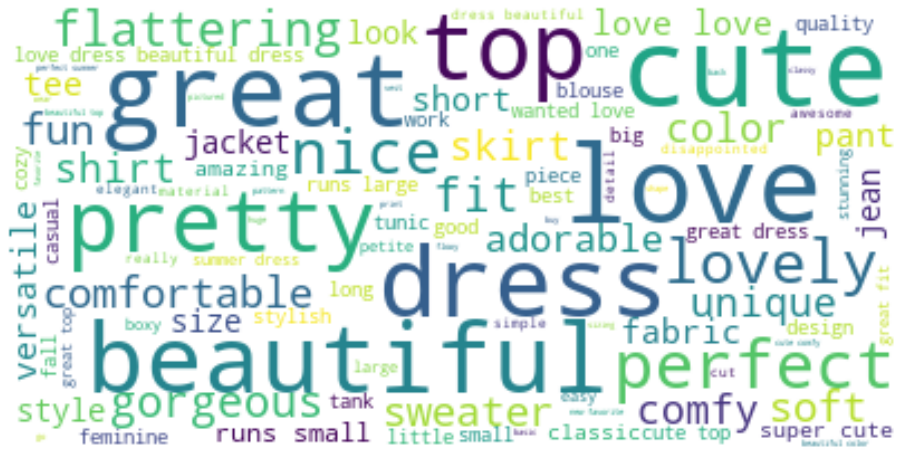

In [41]:
# 출력 사이즈 설정
plt.rcParams['figure.figsize'] = (16,16)

# wordcloud를 저장한다.
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filltered_sentence))

# wordcloud를 출력한다.
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 이제부터는 Review Text에 대한 word cloud를 진행해보자.

In [43]:
# findall 함수를 사용해 띄어쓰기 단위로 글자만을 가져온다. (소문자 변환도 수행)
tokens = re.findall("[\w]+", df_clean['Review Text'].str.cat(sep=' ').lower())

# tokens에서 'stopword;에 해단되지 않는 단어를 골라내어 filltered_sentence에 저장한다.
filltered_sentence = [token for token in tokens if not token in en_stops]
filltered_sentence

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 '5',
 '8',
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'c

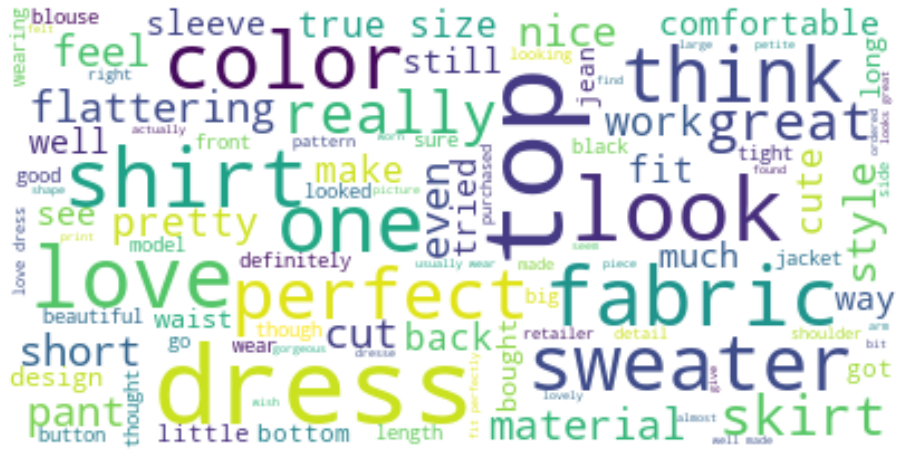

In [44]:
# 출력 사이즈 설정
plt.rcParams['figure.figsize'] = (16,16)

# wordcloud를 저장한다.
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filltered_sentence))

# wordcloud를 출력한다.
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

# 시각화 마지막, Recommended IND 시각화

<AxesSubplot:>

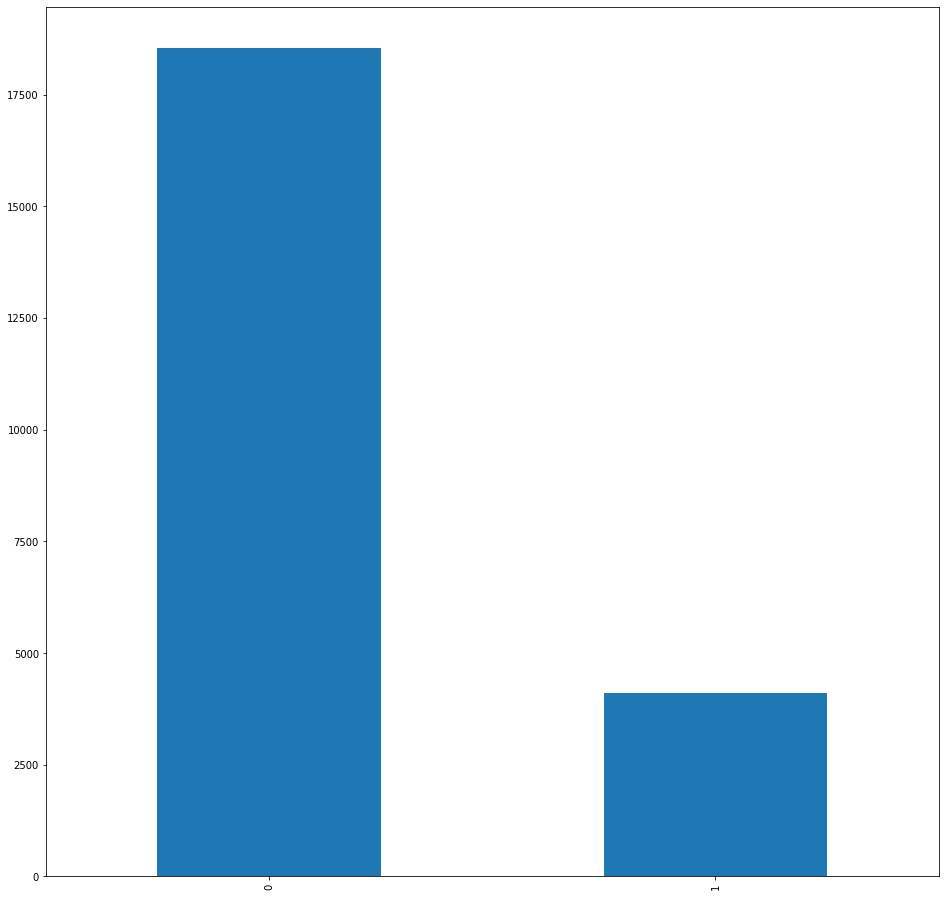

In [45]:
# 이후 머신러닝에서 label로 사용할 데이터기 때문에, 이 데이터의 분포를 확인하는게 중요하기 때문에 시각화한다.
df_clean['Recommended IND'].value_counts().plot(kind='bar')

In [46]:
# 분포를 도수분포표로 확인한다. (추천하는 것이 0)
df_clean['Recommended IND'].value_counts()

0    18540
1     4101
Name: Recommended IND, dtype: int64

# 데이터 전 처리

In [56]:
# Tfidf에 대한 Example(1)
sample = ['I am studying project subject', 'I am studing natural language preprocessing']
sample_vectorizer = TfidfVectorizer(stop_words = 'english')

sample_matrix = sample_vectorizer.fit_transform(sample)

In [59]:
# Tfidf에 대한 Example(2)
sample_vectorizer.vocabulary_

{'studying': 5,
 'project': 3,
 'subject': 6,
 'studing': 4,
 'natural': 1,
 'language': 0,
 'preprocessing': 2}

In [61]:
# Tfidf에 대한 Example(3)
sample_matrix[0].toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.57735027, 0.57735027]])

In [62]:
# 자연어 전 처리 - Tfidf; skitlearn에서 제공하는 TfidVectorizer를 사용하여 문자열 데이터를 수치 자료형 벡터로 변환하자.
# Tfidf는 자연어의 빈도를 기반으로 계산되는 벡터
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer을 불러온다. (stop_words는 영어로 설정)
vectorizer = TfidfVectorizer(stop_words = 'english')

# 소문자화 'Review Text' 데이터를 Tfidf로 변환한다.
X = vectorizer.fit_transform(df_clean['Review Text'].str.lower())

In [63]:
# 변환된 X의 크기를 보자.
X.shape

(22641, 13855)

In [51]:
# 에측해야 할 변수 'Recommended IND'만을 선택하여 numpy 형태로 y에 저장한다.
y = df_clean['Recommended IND']
y = y.to_numpy().ravel() # 1차원 벡터 형태로 출력하기 위해 ravel 사용

In [64]:
vectorizer.get_feature_names()

['00',
 '000',
 '00p',
 '02',
 '03',
 '03dd',
 '04',
 '06',
 '0dd',
 '0in',
 '0p',
 '0petite',
 '0r',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '100lb',
 '100lbs',
 '101',
 '102',
 '102lbs',
 '103',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '106',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108lbs',
 '109',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112lb',
 '112lbs',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115ish',
 '115lb',
 '115lbs',
 '115llbs',
 '116',
 '116bs',
 '116ibs',
 '116lb',
 '116lbs',
 '117',
 '117bl',
 '117lbs',
 '118',
 '118lb',
 '118lbs',
 '119',
 '11and',
 '11in',
 '11inches',
 '12',
 '120',
 '120lb',
 '120lbs',
 '121',
 '122',
 '122lb',
 '122lbs',
 '123',
 '123lb',
 '123lbs',
 '123lbssize',
 '124',
 '124lb',
 '124lbs',
 '125',
 '125b',
 '125ibs',
 '125ish',
 '125lb',
 '125lbs',
 '126',
 '126lbs',

# 학습, 테스트 데이터 분리

In [68]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_text_split을 사용하여 손 쉽게 분리 할 수 있다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 머신러닝 모델 학습
## 기본적인 분류 모델인 의사결정나무(Decision Tree)를 사용하여 학습을 수행하고, 이후 다양한 모델을 살펴보자.

In [69]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 DecisionTreeClassifier class를 가져온다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습한다.
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
# score 함수를 사용하여 모델의 성능(accuracy)을 출력한다.
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8001766394347538


# 다양한 분류 학습 모델
## 의사결정나무 모델 이외의 다양한 분류 알고리즘을 사용하고 그 성능을 비교해보자.

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

models = []
models.append(('KNN', KNeighborsClassifier())) # KNN 모델
models.append(('NB-M', MultinomialNB())) # 멀티노미얼 나이브 베이즈
models.append(('RF', RandomForestClassifier())) # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto'))) # SVM 모델
models.append(('XGB', XGBClassifier())) # XGB 모델

for name, model in models:
    model.fit(X_train, y_train)
    msg = '%s - train_score : %f, test score : %f' %(name, model.score(X_train, y_train), model.score(X_test,y_test))
    print(msg)

KNN - train_score : 0.885987, test score : 0.831972
NB-M - train_score : 0.836020, test score : 0.814749
RF - train_score : 1.000000, test score : 0.840583
SVM - train_score : 0.821996, test score : 0.806359
[15:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\KangByoungWoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



XGB - train_score : 0.947659, test score : 0.872378


In [ ]:
# xgb 모델에서 변수 중요도를 출력한다. xgb.plot_importance 부분. 이번 프로젝트의 핵심이래.
# 변수 중요도란, 모델을 만들었을 때 특정 변수가 결과물에 얼마나 영향을 미쳤는지 그 정도를 나타낸 것.
